In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("jam_axi_rms_2.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
print(np.where(log_prob == log_prob.max()))
print(log_prob.max())

(array([2893, 2894, 2895, 2896, 2897, 2898, 2899, 2900, 2901, 2902, 2903,
       2904, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914,
       2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925,
       2926, 2927, 2928, 2929]), array([32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32]))
-11.528838507442742


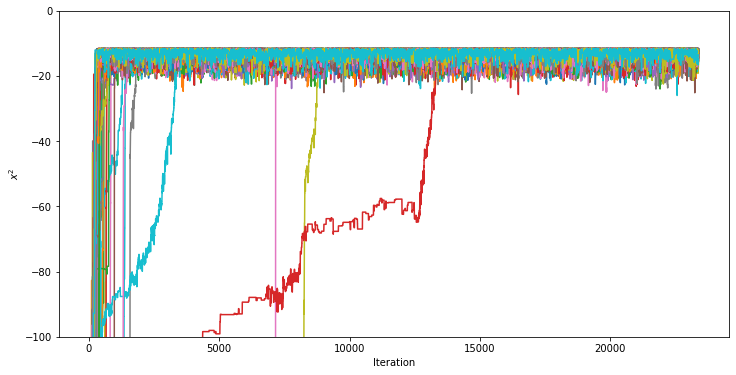

In [5]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-100, 0)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

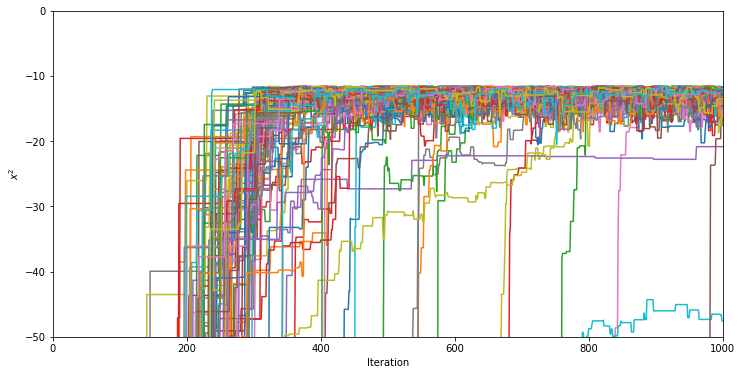

In [6]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-50, 0)
    plt.xlim(0,1000)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [7]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([4876., 4803., 4919., 4858., 4900., 4967., 4898., 4854., 4861.,
       4807., 4841., 4829., 4725., 4874.,  219., 4822., 4811., 4825.,
       4847., 4777., 4910., 4926., 4757., 4771., 4614., 4917., 4847.,
       4826., 4897., 4866., 4860., 4839., 4831., 4700., 4754., 4820.,
       4986., 4764., 4861., 4691., 4759., 4753., 4937., 4825., 4876.,
       4690., 3700., 4847., 3395., 4796., 4762., 4751., 4756., 4764.,
       4860., 4757., 4765., 4678., 4671., 4842., 4787., 4758., 4791.,
       4935., 4686., 4924., 4830.,  500., 4985., 4815., 4892., 4831.,
       4826., 2822., 4767., 4822., 4866., 4939., 4768., 4789., 4844.,
       4807., 4878., 4842., 4898., 4816., 4855., 4825., 4837., 4853.,
       4876., 4775., 4784., 4768., 4901., 4762., 4867., 4839., 4782.,
       4917.,  147., 4713., 4889., 4767., 4874., 4885., 4760., 4882.,
       4799., 4932., 4773., 4924.,  188., 4873., 4922., 4882., 4845.,
       4868., 4714., 4796.])

[ 52.10914284 254.33440255 211.70251675  38.77968867]
flat chain shape: (2685600, 4)
flat log prob shape: (2685600,)


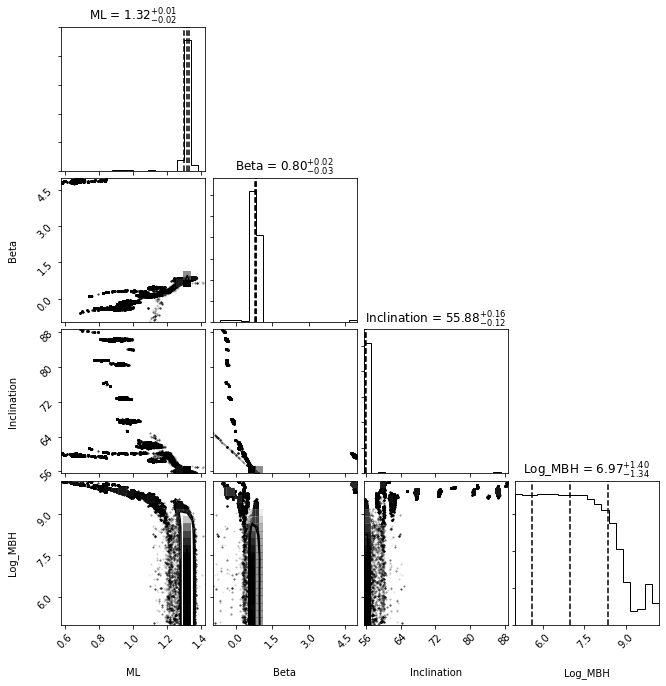

In [17]:
#Corner plots

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(discard=1000, flat=True, )
log_prob_samples = read.get_log_prob(discard=1000,flat=True,)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

254 254
flat chain shape: (10920, 4)
flat log prob shape: (10920,)


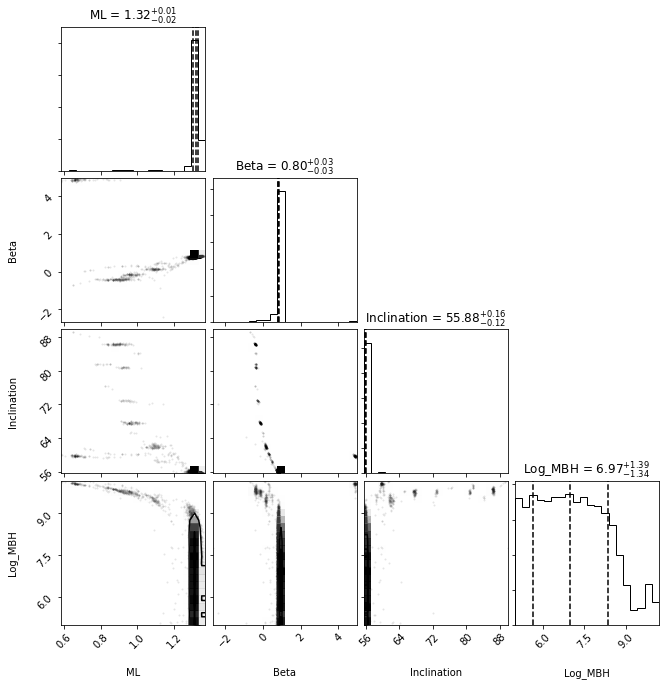

In [28]:
#Corner plots
tau = read.get_autocorr_time()
burnin = int(np.max(tau))
thin = int(np.max(tau))
print(burnin, thin)

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

samples = read.get_chain(discard=burnin, flat=True,thin=thin )
log_prob_samples = read.get_log_prob(discard=burnin,flat=True,thin=thin)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

In [9]:
from IPython.display import display, Math

for i in range(4):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
tau = read.get_autocorr_time()
tau

array([ 52.10914284, 254.33440255, 211.70251675,  38.77968867])

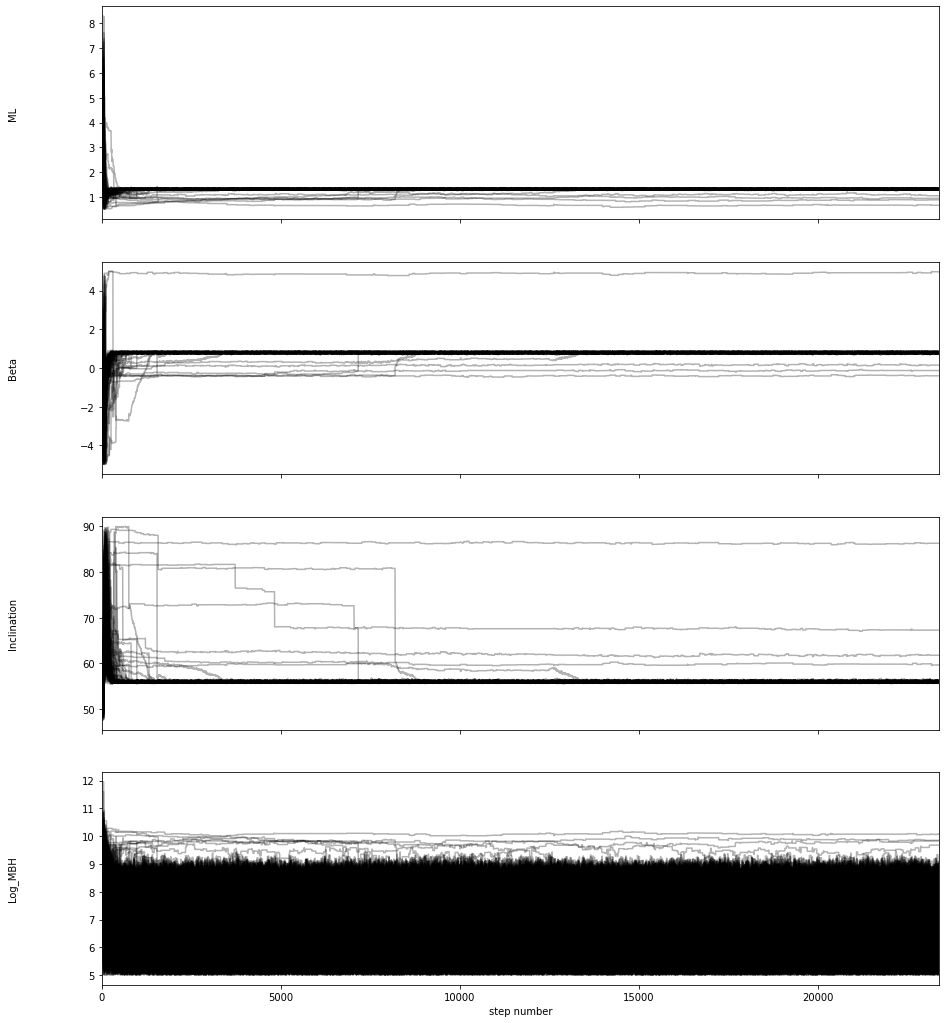

In [11]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [18]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile.txt", unpack=True)

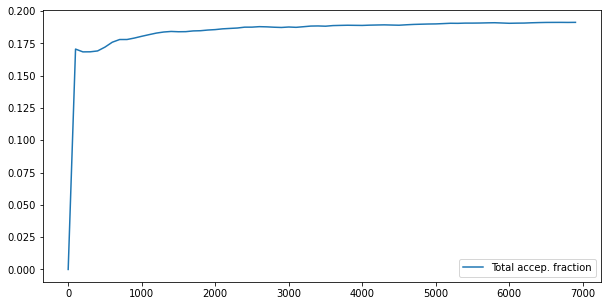

In [19]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

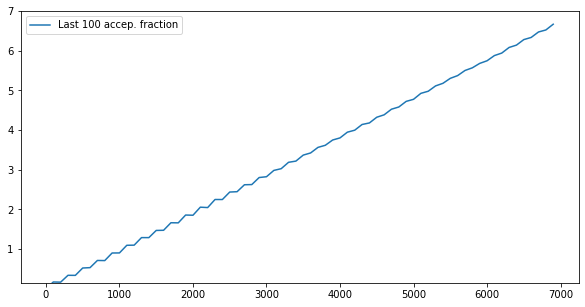

In [20]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
plt.ylim(0.15,)
plt.legend()